# Deep Learning Lab 3 - Linear Regression

### By Sravanth Chowdary Potluri CS20B10006

1. Implement the linear regression model from scratch using gradient descent.
Start with initializing the parameters m (slope) and c (y-intercept) to zero.
-- Define the loss function as Mean Squared Error (MSE).
-- Calculate the gradients of the loss function with respect to m and c.
-- Update the parameters m and c using the gradients and a learning rate.
-- Iterate the above steps for a fixed number of iterations or until convergence.
-- Plot the cost function over iterations and observe if it is decreasing.
-- After the model is trained, predict the output for a given input and compare it with the actual output.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [63]:
# loading the dataset
data = pd.read_csv('Linear Regression Dataset - data.csv')
data.head()

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


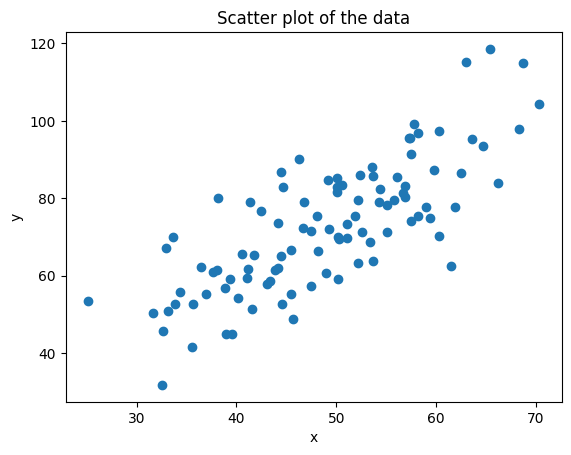

In [64]:
# plotting the data
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the data')
plt.show()

In [65]:
# defining the linear regression model class
class LinearRegression:
    def __init__(self, learning_rate=0.0001, iterations=100):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.m = 0
        self.c = 0
        self.mse = []

    def fit(self, X, y):
        n = len(X)
        for i in range(self.iterations):
            y_pred = self.m * X + self.c
            self.mse.append((1/n) * sum([val**2 for val in (y - y_pred)]))
            md = -(2/n) * sum(X * (y - y_pred))
            cd = -(2/n) * sum(y - y_pred)
            self.m = self.m - self.learning_rate * md
            self.c = self.c - self.learning_rate * cd
            print(f'm: {self.m}, c: {self.c}, cost: {self.mse[-1]}, iteration: {i+1}')
            # break if the cost is not changing
            if len(self.mse) > 1 and self.mse[-2] - self.mse[-1] < 1e-4:
                self.iterations = i + 1
                break

    def predict(self, X):
        return self.m * X + self.c

In [66]:
# training the model
X = data['x']
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression(learning_rate=0.0001, iterations=100)
model.fit(X_train, y_train)

m: 0.7629422011263894, c: 0.014907276126399999, cost: 5783.233379980289, iteration: 1
m: 1.134336709664486, c: 0.02221687456591354, cost: 1454.4106841117484, iteration: 2
m: 1.3151282288614958, c: 0.025827970247927837, cost: 428.6172627067852, iteration: 3
m: 1.403135394499438, c: 0.02763865735509663, cost: 185.53675687734503, iteration: 4
m: 1.4459757120493775, c: 0.02857291636828415, cost: 127.93432505347636, iteration: 5
m: 1.4668290879694212, c: 0.02908053525735123, cost: 114.2842993454329, iteration: 6
m: 1.4769793570193117, c: 0.029380468017563537, cost: 111.04959638582946, iteration: 7
m: 1.4819194200058432, c: 0.02957930009641135, cost: 110.28299375514582, iteration: 8
m: 1.4843231869884692, c: 0.029728916628957856, cost: 110.10125242828686, iteration: 9
m: 1.4854923008071992, c: 0.029854574977291864, cost: 110.05810463540523, iteration: 10
m: 1.4860603931270016, c: 0.029968570268697408, cost: 110.04779910448977, iteration: 11
m: 1.4863359119141775, c: 0.030076887694915063, cos

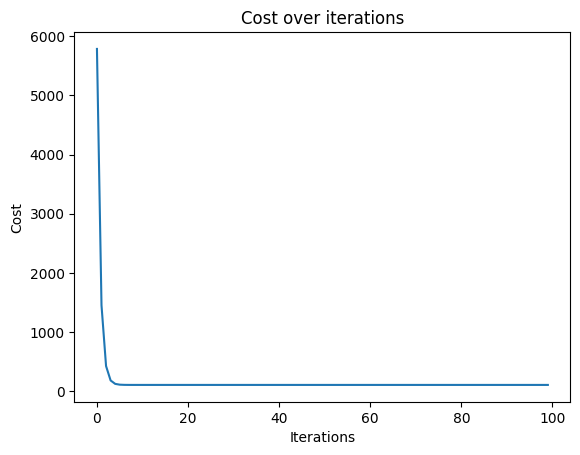

In [67]:
# plotting the cost over iterations
plt.plot(range(model.iterations), model.mse)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over iterations')
plt.show()

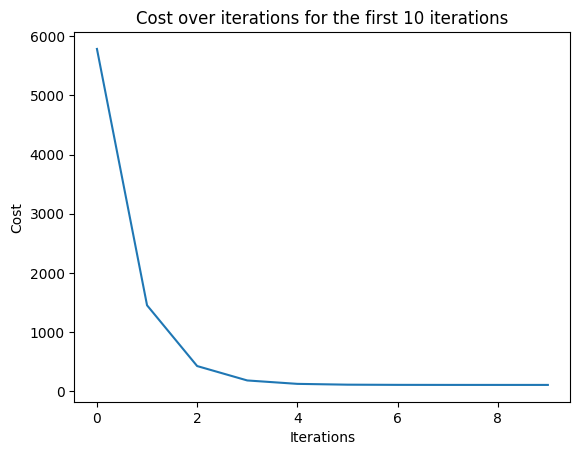

In [68]:
# plotting the cost over iterations for the first 10 iterations
plt.plot(range(10), model.mse[:10])
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over iterations for the first 10 iterations')
plt.show()

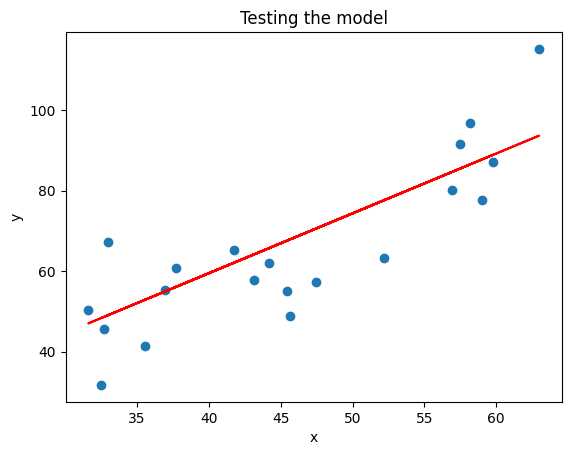

In [69]:
# testing the model
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Testing the model')
plt.show()